### IMPORTING LIBRARIES AND LOADING DATA

In [64]:
#loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import nltk
nltk.download('stopwords')
from nltk import tokenize
from nltk.corpus import stopwords

# importing the ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
fake_data = pd.read_csv('datasets/Fake.csv')
true_data = pd.read_csv('datasets/True.csv')


In [51]:
print(fake_data.shape, true_data.shape)

(23481, 4) (21417, 4)


### DATA CLEANING


In [52]:
fake_data['target'] = 'fake'
true_data['target'] = 'true'
print(fake_data.describe(), true_data.describe())

                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date target  
count          23481  23481  
unique          1681      1  
top     May 10, 2017   fake  
freq              46  23481                                                       title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique       

In [53]:
# concatenating the dataframe
data = pd.concat([fake_data,true_data]).reset_index(drop = True)
data.shape

(44898, 5)

In [54]:
#shuffling
data = shuffle(data).reset_index(drop = True)
data.head()


,title,text,subject,date,target
0,"Once Again, Trump Proves How INCREDIBLY Ignor...",President Donald Trump does not know anything ...,News,"April 23, 2017",fake
1,Wilbur Ross seen imposing Mexico sugar deal ov...,WASHINGTON (Reuters) - U.S. Commerce Secretary...,politicsNews,"June 9, 2017",true
2,White House says more work needed on Republica...,WASHINGTON (Reuters) - The White House is conc...,politicsNews,"April 13, 2016",true
3,WHY DID HARRY REID LIE ABOUT THE “ACCIDENT” He...,Dirty Harry must ve jarred something in his he...,Government News,"Apr 9, 2015",fake
4,TUCKER ON COMEY’S FIRING: “Dictatorship by the...,TUCKER CARLSON Spoke out tonight on the firing...,politics,"May 10, 2017",fake


In [55]:
data.drop(['title','date'], axis=1, inplace=True)
data.head()


,text,subject,target
0,President Donald Trump does not know anything ...,News,fake
1,WASHINGTON (Reuters) - U.S. Commerce Secretary...,politicsNews,true
2,WASHINGTON (Reuters) - The White House is conc...,politicsNews,true
3,Dirty Harry must ve jarred something in his he...,Government News,fake
4,TUCKER CARLSON Spoke out tonight on the firing...,politics,fake


In [56]:
# convert all the words to lowercase
data.text = data.text.apply(lambda x : x.lower())

In [57]:
#removing punctuations
def removee(text):
    temp = [char for char in text if char not in string.punctuation]
    a = ''.join(temp)
    return a
data['text'] = data['text'].apply(removee)
data.head()


,text,subject,target
0,president donald trump does not know anything ...,News,fake
1,washington reuters us commerce secretary wilb...,politicsNews,true
2,washington reuters the white house is concern...,politicsNews,true
3,dirty harry must ve jarred something in his he...,Government News,fake
4,tucker carlson spoke out tonight on the firing...,politics,fake


In [58]:
#removing stopwords
stop = stopwords.words('english')
# print(stop)
def removal(text):
    words = text.split()
    temp = [word for word in words if word not in stop]
    return ' '.join(temp)
data['text'] = data['text'].apply(removal)

print(data.text)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
# PREPARING THE DATA (splitting into training and testing data)
x_train, x_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.2,random_state=42)


### EXPLORING DATA

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


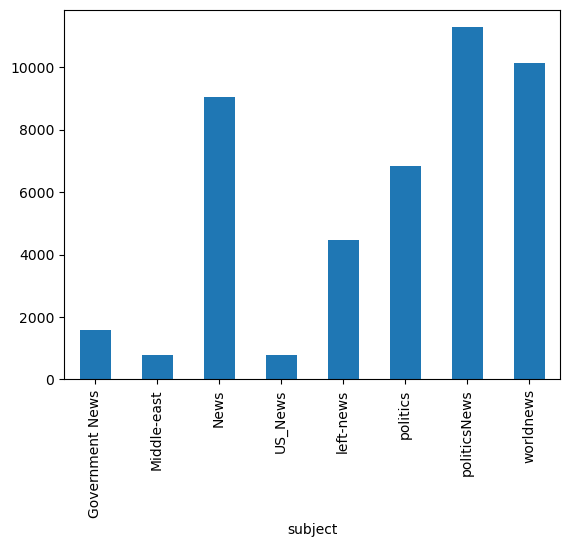

In [59]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind = 'bar')
plt.show()

In [60]:
#most frequent words in each type(true news and fake news)
token = tokenize.WhitespaceTokenizer()
def counter(text, column,count):
    all_words = ' '.join([text for text in text[column]])
    token_phrase = token.tokenize(all_words)
    freq = nltk.FreqDist(token_phrase)
    df_freq = pd.DataFrame({'Word' : list(freq.keys()),
                            "Frequency" : list(freq.values())})
    df_freq = df_freq.nlargest(columns='Frequency', n = count)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_freq, x = "Word", y = 'Frequency', color = 'teal')
    ax.set(ylabel = 'Count')
    plt.xticks(rotation = 'vertical')
    plt.show()

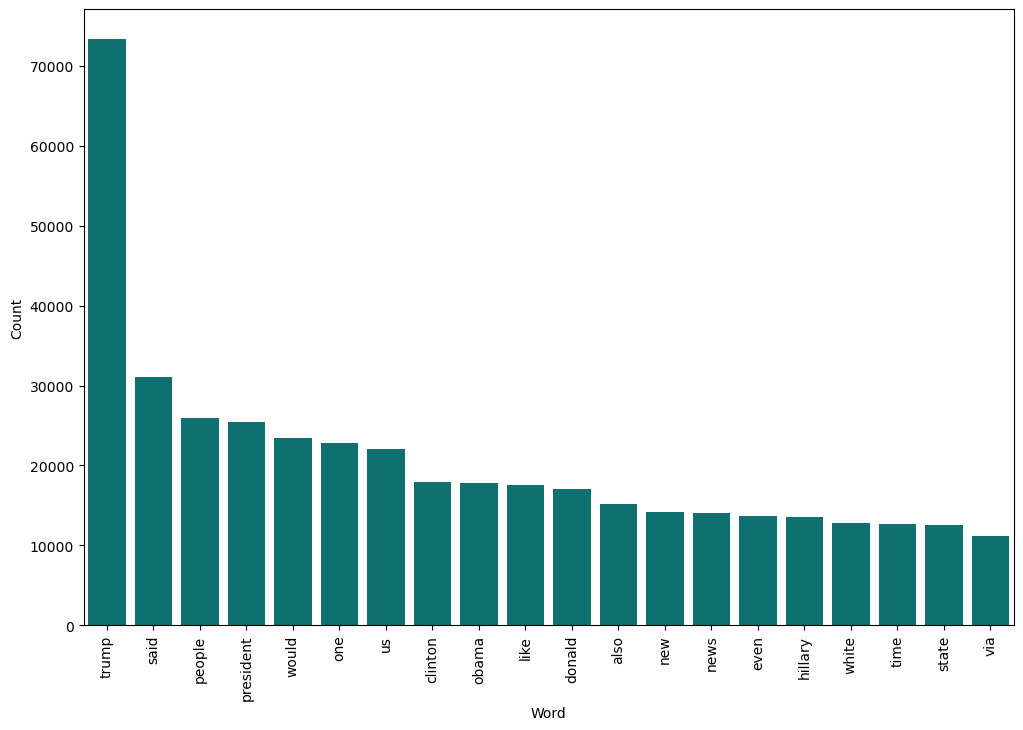

In [61]:
#most frequent in fake news
counter(data[data['target'] == 'fake'], 'text',20)

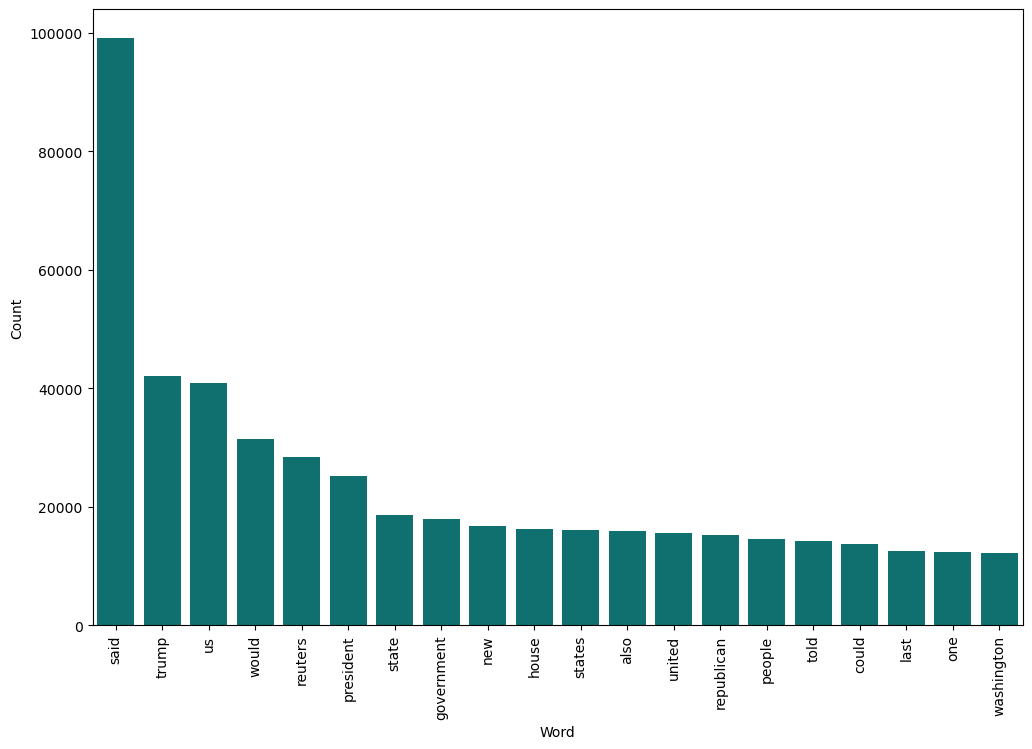

In [62]:
#most frequent words in real news
counter(data[data.target == 'true'],'text',20)

### TRAINING & TESTING THE MODEL

#### NAIVE BAYES

In [85]:
dct = dict()
clf = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', clf)])
model = pipe.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))

dct['Naive Bayes'] = round(accuracy_score(y_test, pred)*100,2)


0.9536748329621381
accuracy_score = 95.0 %


#### LOGISTIC REGRESSION

In [86]:
clf = LogisticRegression()
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', clf)
])
pipe.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
dct['Logistic Regression'] = round(accuracy_score(y_test, pred)*100,2)


0.9536748329621381
accuracy_score = 0.95 %


#### DECISION TREE

In [87]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
model = pipe.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
dct['Decision Tree'] = round(accuracy_score(y_test, pred)*100,2)


0.995879732739421
accuracy_score = 1.0 %


#### SVM

In [89]:
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print(accuracy_score(y_test,pred))

dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

0.995879732739421


### COMPARING MODELS

([<matplotlib.axis.YTick at 0x339157b10>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

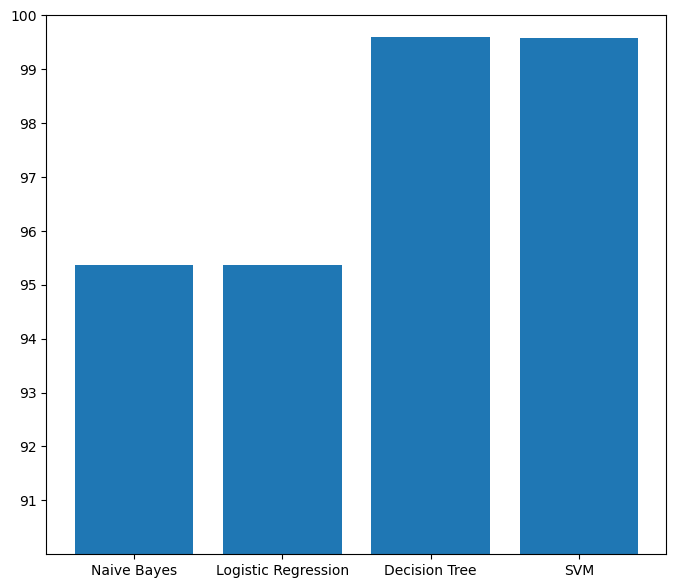

In [90]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))